In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

#importing the libraries for datapeprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

#importing the libraries for splitting the data
from sklearn.model_selection import train_test_split

#Libraries for model building
from sklearn import linear_model
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#import the libraries for checking the metrics
from sklearn.metrics import r2_score,mean_squared_error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

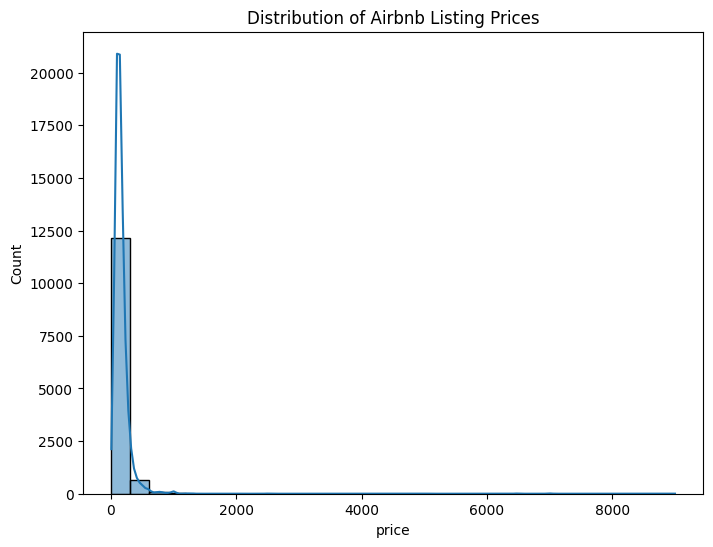

In [7]:

# Load the dataset
url = "https://raw.githubusercontent.com/raj4rachit/Assignment_1_DS250723_Python/main/Machine_learning/data/airbnb_listing_train.csv"
df_train = pd.read_csv(url)

# Display basic information about the dataset
df_train.info()

# Check for missing values
df_train.isnull().sum()

# Explore the distribution of the target variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df_train['price'], bins=30, kde=True)
plt.title('Distribution of Airbnb Listing Prices')
plt.show()


In [8]:
# Feature Selection
X = df_train.drop(['price'], axis=1)
y = df_train['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
def aboutdf (df):
    count_null = df.isnull().sum()
    df_stats = pd.DataFrame(index = df.columns, data =
                           {'datatype': df.dtypes,
                            'unique_values': df.nunique(),
                            'have_null?': df.isnull().any(),
                            'Number of null values' : count_null,
                            'percentage of null values' : count_null/df.shape[0]*100 })
    return df_stats

In [10]:
aboutdf(df_train)

,datatype,unique_values,have_null?,Number of null values,percentage of null values
id,int64,12901,False,0,0.000000
name,object,12653,True,22,0.170529
host_id,int64,11601,False,0,0.000000
host_name,object,4536,True,8,0.062011
neighbourhood_group,float64,0,True,12901,100.000000
neighbourhood,object,22,False,0,0.000000
latitude,float64,5227,False,0,0.000000
longitude,float64,7887,False,0,0.000000
room_type,object,4,False,0,0.000000
minimum_nights,int64,56,False,0,0.000000


In [11]:
df_train = df_train.drop('neighbourhood_group', axis = 1)
bool_series = pd.notnull(df_train["name"])
df_train[bool_series].name

0                      Luxury home 100m2+garden in center!
1                              East is where your home is!
2          Amsterdam Central - LUXURY house in BUSY STREET
3                               great appartment down town
4            Private room with canal view in peaceful area
                               ...                        
12896    Quiet stylish private room 15 mins to city  ce...
12897    Beautiful, spacious apt. with great views @ IJ...
12898                  Great apartment de Pijp/Albert Cuyp
12899             Stylish apartment in an amazing location
12900                     Amsterdam Apartments First Floor
Name: name, Length: 12879, dtype: object

In [14]:
df_train.name.describe()


count         12879
unique        12653
top       Amsterdam
freq             28
Name: name, dtype: object

In [15]:
df_train[bool_series].groupby(['name']).size().sort_values(ascending = False).reset_index(name = 'count').head(100)

,name,count
0,Amsterdam,28
1,Spacious apartment near Vondelpark,6
2,Lovely apartment in Amsterdam,5
3,Spacious apartment in Amsterdam,5
4,Cosy apartment in the city centre of Amsterdam,4
...,...,...
95,Home sweet home,2
96,Spacious private room in the heart of Amsterdam,2
97,Light appartment in Amsterdam,2
98,NEW! Temporary housing in the centre of Amsterdam,2


In [16]:
d = df_train[bool_series].groupby(['name']).size().sort_values(ascending =False).reset_index(name = 'count').head(100)

In [17]:
fig = px.bar(d,
            y = 'name',
            x = 'count',
            range_x = [0,30])

fig.update_layout(autosize = False,
                 height = 500,
                 width = 1400,
                 font = dict(size = 15, color = "#0f0f0f", family = "Courier New, monospace"))



fig.show()

In [18]:
df_train.host_name.describe()

count       12893
unique       4536
top       Martijn
freq           76
Name: host_name, dtype: object

In [19]:
bool_series1 = pd.notnull(df_train["host_name"])
df_train[bool_series1].host_name

0        Marjolein
1              Ana
2             Mark
3            Ayden
4           Alissa
           ...    
12896     Michelle
12897         Rens
12898     Francien
12899         Olaf
12900         City
Name: host_name, Length: 12893, dtype: object

In [20]:
df_train[bool_series1]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12896,20757739,Quiet stylish private room 15 mins to city ce...,63932037,Michelle,De Baarsjes - Oud-West,52.37194,4.84965,Entire home/apt,1,1,13-09-2017,0.03,1,88,65
12897,1055570,"Beautiful, spacious apt. with great views @ IJ...",5813322,Rens,IJburg - Zeeburgereiland,52.36263,4.98031,Entire home/apt,7,238,25-02-2020,2.75,1,357,160
12898,13178435,Great apartment de Pijp/Albert Cuyp,46370427,Francien,De Pijp - Rivierenbuurt,52.35719,4.90009,Entire home/apt,3,15,07-10-2018,0.31,1,0,180
12899,21963760,Stylish apartment in an amazing location,4895882,Olaf,Zuid,52.34855,4.85105,Entire home/apt,2,11,28-04-2019,0.37,1,0,136


In [21]:
df_train[bool_series1].groupby(['host_name']).size().sort_values( ascending = False).reset_index(name = 'count').head(100)

,host_name,count
0,Martijn,76
1,Anne,58
2,Thomas,53
3,Tim,51
4,Marieke,51
...,...,...
95,Sara,20
96,Steven,20
97,Floor,20
98,Dennis,20


In [22]:
d = df_train[bool_series1].groupby(['host_name']).size().sort_values(ascending = False).reset_index(name = 'count').head(100)
fig = px.bar (d,
             y = 'host_name',
             x = 'count',
             range_x = [0,80])



fig.update_layout(autosize = False,
                 height = 500,
                 width = 1400,
                 font = dict(size = 15, color = '#0f0f0f', family = 'Courier New, monospace'))

In [23]:
df_train.neighbourhood.describe()

count                      12901
unique                        22
top       De Baarsjes - Oud-West
freq                        2209
Name: neighbourhood, dtype: object

In [25]:
d=df_train.groupby(['last_review']).size().sort_values(ascending=False).reset_index(name='count').head(100)
fig=px.scatter(d,
                           x='last_review',
                           y='count',
                           size='count',
                           color='last_review',
                           range_y=[0,300],
                           #range_x=[0,900]
                           )
fig.update_layout(autosize=False,
                  height=500,
                  width=1400,
                  font=dict(size=15,color="#0f0f0f",family="Courier New, monospace"),
                 )
fig.show()

<ipython-input-26-aced8f934e33>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

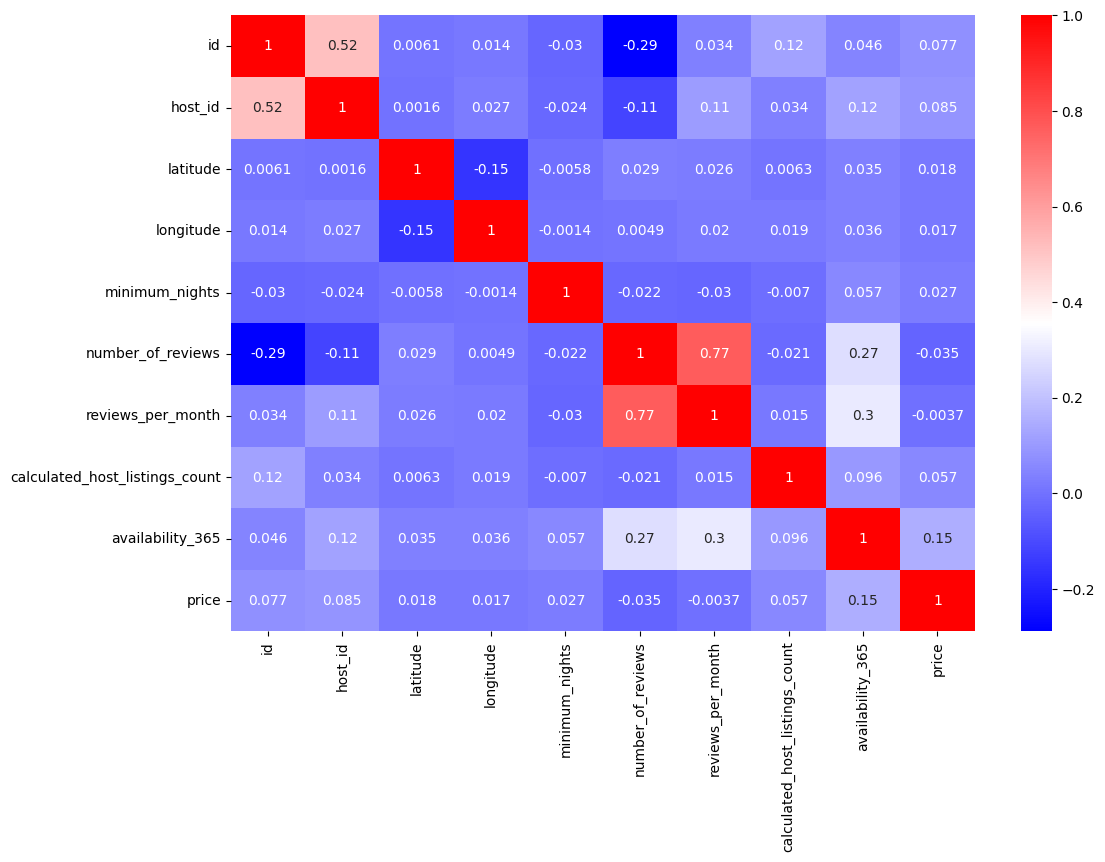

In [26]:
plt.figure (figsize = (12, 8))
sns.heatmap(df_train.corr(), cmap = 'bwr', annot = True)

In [27]:
df_train_dup=df_train[df_train.duplicated()]

df_train_dup.shape

(0, 15)

In [29]:
df_train['last_review']=pd.to_datetime(df_train['last_review'])

df_train['name'].fillna(df_train['name'].mode()[0], inplace=True)
df_train['host_name'].fillna(df_train['host_name'].mode()[0],inplace=True)
df_train['last_review'].fillna(df_train['last_review'].mean(),inplace=True)
df_train['reviews_per_month'].fillna(df_train['reviews_per_month'].mean(),inplace=True)

<ipython-input-29-b462be166c36>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [30]:
df_train["day"] = df_train['last_review'].map(lambda x: x.day)
df_train["month"] = df_train['last_review'].map(lambda x: x.month)
df_train["year"] = df_train['last_review'].map(lambda x: x.year)

In [31]:
df_train['day'].describe()

count    12901.000000
mean        14.106116
std          8.857667
min          1.000000
25%          8.000000
50%         13.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [32]:
df_train['month'].describe()

count    12901.000000
mean         5.710488
std          3.406852
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         12.000000
Name: month, dtype: float64

In [33]:
df_train['year'].describe()

count    12901.000000
mean      2018.760794
std          1.222331
min       2012.000000
25%       2018.000000
50%       2019.000000
75%       2020.000000
max       2020.000000
Name: year, dtype: float64